In [38]:
import numpy as np
import pandas as pd
#import fiona 
import geopandas as gpd
#import math
#from netCDF4 import Dataset
#import xarray as xa
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import datetime
import random
from scipy.interpolate import interp1d

In [26]:
# File written by dday_slope-radadj.ipynb
radadj_fn = 'c:/Users/markstro/work1.1/soltab/dday_slope_radadj_GF_v1.1.csv'
radadj_solf_fn = 'c:/Users/markstro/work1.1/soltab/dday_slope_radadj_solf_GF_v1.1.csv'
pptadj_fn = 'c:/Users/markstro/work1.1/soltab/dday_slope_pptadj_GF_v1.1.csv'
gdb_path = 'c:/Users/markstro/work1.1/GIS/GFv1.1_v2e.gdb'

param_path = "c:/Users/markstro/work1.1/paramdb_v1.1/paramdb_master/"

In [3]:
nhru_v11 = gpd.read_file(gdb_path, layer='nhru_v11')

In [4]:
nhru_v11_ids = nhru_v11["nhru_v11"].values
nhru = len(nhru_v11_ids)
print(nhru)
print(nhru_v11_ids)

nmonths = 12
print(nhru * nmonths)

114958
[76127 76147 76170 ... 64150 65633 18843]
1379496


In [5]:
# Read PRMS parameters
tmax_allrain_offset_f = pd.read_csv(param_path + "tmax_allrain_offset.csv")
tmax_allrain_offset = tmax_allrain_offset_f["tmax_allrain_offset"].values

tmax_allsnow_f = pd.read_csv(param_path + "tmax_allsnow.csv")
tmax_allsnow = tmax_allsnow_f["tmax_allsnow"].values
tmax_allrain = tmax_allsnow + tmax_allrain_offset

print(tmax_allrain)
print(tmax_allrain.shape)

tmax_allrain.shape = (nmonths, nhru)

print(tmax_allrain.shape)

# These 2D parameters are all set to constants
ppt_rad_adj = 0.02
tmax_index = 50.0
radj_sppt = 0.44
radj_wppt = 0.55
radadj_intcp = 1.0
radadj_slope = 0.02

[36.573334 37.46     37.39     ... 33.       33.       33.      ]
(1379496,)
(12, 114958)


In [6]:
# read the radadj values from the csv file produced by dday_slope-radadj.ipynb
radadj_df = pd.read_csv(radadj_fn)

In [7]:
radadj = radadj_df.iloc[:, 1:367].values
print(radadj.shape)
print(radadj)

(114958, 366)
[[0.55548736 0.55395482 0.55243071 ... 0.50950792 0.50842039 0.50722945]
 [0.51694796 0.51572151 0.51429799 ... 0.47002175 0.46908787 0.46806488]
 [0.56715888 0.56569461 0.56399583 ... 0.51319704 0.51208671 0.51087087]
 ...
 [0.39707621 0.39563913 0.39410309 ... 0.37876289 0.37770014 0.37643269]
 [0.51270796 0.51047432 0.50792109 ... 0.53035199 0.52837909 0.52642081]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]]


In [8]:
radadj_nhru_v11_v = radadj_df["nhru_v11"].values
print(radadj_nhru_v11_v)

[76127 76147 76170 ... 64150 65633 18843]


In [9]:
# read the pptadj values from the csv file produced by dday_slope-pptadj.ipynb
# pptadj_df = pd.read_csv(pptadj_fn)

dates = [datetime.datetime(2015, 1, 1), datetime.datetime(2015, 1, 2), datetime.datetime(2015, 1, 3),
         datetime.datetime(2015, 1, 4)]
ndays = len(dates)

foo = np.random.random_sample(((nhru*ndays),))
foo.shape = (4, nhru)

hru_id_str = np.empty(nhru, dtype='int')
for jj in range(nhru):
    hru_id_str[jj] = jj+1

# Create the pandas DataFrame. This should be comparable to what has been produced and read in from pptadj_fn)
pptadj_df = pd.DataFrame(foo, columns = hru_id_str)
pptadj_df["date"] = dates

pptadj_df.head()

,1,2,3,4,5,6,7,8,9,10,...,114950,114951,114952,114953,114954,114955,114956,114957,114958,date
0,0.082531,0.669620,0.028350,0.785106,0.052309,0.494108,0.948708,0.971430,0.855506,0.499365,...,0.124832,0.855745,0.397715,0.821708,0.788874,0.956351,0.341847,0.845512,0.895715,2015-01-01
1,0.837744,0.520962,0.090559,0.053377,0.670583,0.201824,0.767917,0.960934,0.551316,0.566071,...,0.595882,0.933841,0.468868,0.723092,0.199099,0.113507,0.247814,0.280656,0.197843,2015-01-02
2,0.313559,0.874446,0.250543,0.853634,0.566480,0.083146,0.249503,0.177856,0.284221,0.347294,...,0.450335,0.415605,0.934481,0.913622,0.608806,0.241506,0.656129,0.685773,0.311510,2015-01-03
3,0.816500,0.419055,0.577222,0.780861,0.123033,0.030065,0.306067,0.317806,0.640859,0.995908,...,0.208673,0.603438,0.237311,0.679076,0.792163,0.253350,0.667945,0.591145,0.034884,2015-01-04


In [13]:
pptadj_v = pptadj_df.iloc[:, 0:nhru].values
print(pptadj_v)

[[0.08253087 0.66962048 0.02835027 ... 0.34184725 0.84551162 0.89571506]
 [0.83774438 0.52096224 0.09055912 ... 0.24781363 0.28065601 0.19784258]
 [0.31355915 0.87444649 0.25054345 ... 0.65612909 0.68577252 0.31150994]
 [0.8164996  0.41905471 0.57722192 ... 0.66794522 0.59114518 0.03488397]]


In [15]:
radadj_solf = np.zeros((len(pptadj_df["date"]), nhru))

ii = 0
for date in pptadj_df["date"]:
    jday = date.dayofyear
    print(date, jday)
    
    for ihru in range(nhru):
        radadj_solf[ii,ihru] = radadj[ihru,jday] / pptadj_v[ii,ihru]
    
    ii += 1


2015-01-01 00:00:00 1
2015-01-02 00:00:00 2
2015-01-03 00:00:00 3
2015-01-04 00:00:00 4


In [27]:
print(radadj_solf.shape)
print(radadj_solf)

(4, 114958)
[[ 6.71209194  0.77016986 19.95376708 ...  1.15735646  0.60374607
   0.05582132]
 [ 0.65942634  0.98720781  6.22792999 ...  1.59032044  1.80976384
   0.25272618]
 [ 1.75623168  0.58652223  2.24387024 ...  0.59799538  0.73672485
   0.16050852]
 [ 0.67217414  1.22006478  0.97063242 ...  0.58467249  0.84986387
   1.43332305]]


In [29]:
# Create the pandas DataFrame with the radadj values. This is for writing a csv file.
radadj_solf_df = pd.DataFrame(radadj_solf, columns = nhru_v11_ids)
radadj_solf_df["date"] = dates

# This moves the "dates" column to the first position, better for the CSV.
cols = list(radadj_solf_df.columns)
cols = [cols[-1]] + cols[:-1]
radadj_solf_df = radadj_solf_df[cols]

radadj_solf_df.to_csv(path_or_buf=radadj_solf_fn)

In [30]:
radadj_solf_df.head()

,date,76127,76147,76170,76172,76181,76182,76196,76204,76212,...,65320,65360,2373,18844,1914,57964,64080,64150,65633,18843
0,2015-01-01,6.712092,0.770170,19.953767,0.741046,10.002754,1.062355,0.626259,0.611210,0.660329,...,0.765539,4.560687,1.066599,0.125718,0.982587,1.039696,0.830841,1.157356,0.603746,0.055821
1,2015-01-02,0.659426,0.987208,6.227930,10.866187,0.778109,2.593659,0.771491,0.616043,1.021859,...,1.304217,0.949992,0.971699,2.016794,1.110325,4.090787,6.953599,1.590320,1.809764,0.252726
2,2015-01-03,1.756232,0.586522,2.243870,0.677221,0.918561,6.278301,2.366694,3.317812,1.975895,...,324.388923,1.248914,2.168897,1.004607,0.873521,1.327897,3.244994,0.597995,0.736725,0.160509
3,2015-01-04,0.672174,1.220065,0.970632,0.737746,4.216869,17.308020,1.922570,1.850479,0.873370,...,5.303597,2.677980,1.483952,3.921563,1.167316,1.012529,3.070078,0.584672,0.849864,1.433323


In [35]:
solf_pts = np.array([.20, .35, .45, .51, .56, .59, .62, .64, .655, .67, .682, .69, .70, .71, .715, .72, .722, .724, .726,
      .728, .73, .734, .738, .742, .746, .75])
print(solf_pts)
dday_pts = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0,
                     18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0])
print(type(solf_pts))
f2 = interp1d(solf_pts, dday_pts, kind='cubic')

print(f2(0.7))

[0.2   0.35  0.45  0.51  0.56  0.59  0.62  0.64  0.655 0.67  0.682 0.69
 0.7   0.71  0.715 0.72  0.722 0.724 0.726 0.728 0.73  0.734 0.738 0.742
 0.746 0.75 ]
<class 'numpy.ndarray'>
13.0


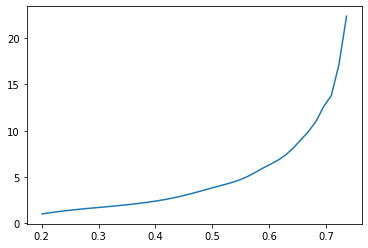

In [53]:
xnew = np.linspace(0.201, 0.749, num=41, endpoint=False)

#for ii in range(len(xnew)):
#    print(xnew[ii])
#    print(xnew[ii], f2(xnew[ii]))

plt.plot(xnew,f2(xnew))
plt.show()

In [55]:
dday = np.zeros(radadj_solf.shape)

ii = 0
for date in pptadj_df["date"]:
    jday = date.dayofyear
    print(date, jday)
    
    for ihru in range(nhru):
        if radadj_solf[ii, ihru] < 0.2:
            dday[ii,ihru] = 1.0
        elif radadj_solf[ii, ihru] > 0.75:
            dday[ii,ihru] = 26.0
        else:
            dday[ii,ihru] = f2(radadj_solf[ii,ihru])
    
    ii += 1

2015-01-01 00:00:00 1
2015-01-02 00:00:00 2
2015-01-03 00:00:00 3
2015-01-04 00:00:00 4


In [56]:
print(dday)

[[26.         26.         26.         ... 26.          6.432625
   1.        ]
 [ 9.29637079 26.         26.         ... 26.         26.
   1.42796125]
 [26.          5.88438019 26.         ...  6.25319786 22.66170694
   1.        ]
 [10.14932288 26.         26.         ...  5.821564   26.
  26.        ]]


In [57]:
# dday = Dday_slope(j, Nowmonth)*Tmax_hru(j) + Dday_intcp(j, Nowmonth) + 1.0
# dday_slope(ihru,imon) = (dday(iday,ihru) - dday_intcp(ihru,imon) - 1.0) / tmax_hru(iday,ihru)

ii = 0
for date in pptadj_df["date"]:
    jday = date.dayofyear
    imon = date.month - 1
    print(date, jday, imon)
    
    for ihru in range(nhru):
        dday_slope_daily[ihru,ii] = (dday[ii,ihru] - dday_intcp[ihru,imon] - 1.0) / tmax_hru[ii,ihru]

2015-01-01 00:00:00 1 1
2015-01-02 00:00:00 2 1
2015-01-03 00:00:00 3 1
2015-01-04 00:00:00 4 1


In [ ]:
for date in pptadj_df["date"]:
    jday = date.dayofyear
    imon = date.month
    print(date, jday, imon)
    
    for ihru in range(nhru):
        dday_slope[ihru,imon] += dday_slope_daily[ihru,ii]
        count[imon] += 1
        
for ihru in range(nhru):
    for ihru in range(0,12):
        dday_slope[ihru,imon] = dday_slope[ihru,imon] / count[imon]
